In [1]:
from argparse import ArgumentParser
import numpy as np
import pandas as pd
import torch
import os
import matplotlib.pyplot as plt
from Datamodule  import DataModule
from pytorch_lightning import Trainer
from load_model import load_model

results_dir='Results'
datapath='data'

# data params
train_res='512x512'
train_energy='all'

# train_res='128x128'
# train_energy='193'


# test_res='128x128'
test_res='512x512'
test_energy='193'

max_samples=-1
cached=True

# Model Params
model_type='MLP'
n_layers=4
hidden_dim=32
kernel_size=5

dm_trained = DataModule(
    datapath=datapath,
    cached=cached,
    max_samples=max_samples,
    batch_size=1,
    num_workers=1,
    res=train_res,
    energy=train_energy
    )
model, model_name = load_model(
    model_type=model_type,
    h_dim=hidden_dim, 
    n_layers=n_layers,
    k_size=kernel_size,
    dm=dm_trained,
    saved=True,
    results_dir=results_dir,
    train_energy=train_energy,
    train_res=train_res
    )
del dm_trained
dm_test = DataModule(
    datapath=datapath,
    cached=cached,
    max_samples=max_samples,
    batch_size=1,
    num_workers=1,
    res=test_res,
    energy=test_energy)
dm_test.setup()
dl_test = dm_test.predict_dataloader()


/home/rodrigo/Desktop/McGill/Research/initial-conditions/.venv/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Results/saved_models/512x512/all M_MLP_nl_4_hdim_32_ksize_5 ['Results/saved_models/512x512/all/M_MLP_nl_4_hdim_32_ksize_5_val_err=1.76e-01.ckpt']

        Loading MLP nl 4 hdim 32 with 1.760000e-01 error
             
Executing setup


In [2]:
dm_512 = DataModule(
    datapath=datapath,
    cached=cached,
    max_samples=max_samples,
    batch_size=1,
    num_workers=1,
    res='512x512',
    energy='all'
    )
dm_128 = DataModule(
    datapath=datapath,
    cached=cached,
    max_samples=max_samples,
    batch_size=1,
    num_workers=1,
    res='128x128',
    energy='193')
model_128, _ = load_model(
    model_type=model_type,
    h_dim=hidden_dim, 
    n_layers=n_layers,
    k_size=kernel_size,
    dm=dm_128,
    saved=True,
    results_dir=results_dir,
    train_energy='193',
    train_res='128x128'
    )
model_512, _ = load_model(
    model_type=model_type,
    h_dim=hidden_dim, 
    n_layers=n_layers,
    k_size=kernel_size,
    dm=dm_512,
    saved=True,
    results_dir=results_dir,
    train_energy='all',
    train_res='512x512'
    )

dm_128.setup()
dl_128 = dm_128.predict_dataloader()
dm_512.setup()
dl_512 = dm_512.predict_dataloader()

Results/saved_models/128x128/193 M_MLP_nl_4_hdim_32_ksize_5 ['Results/saved_models/128x128/193/M_MLP_nl_4_hdim_32_ksize_5_val_err=2.73e-01.ckpt']

        Loading MLP nl 4 hdim 32 with 2.730000e-01 error
             
Results/saved_models/512x512/all M_MLP_nl_4_hdim_32_ksize_5 ['Results/saved_models/512x512/all/M_MLP_nl_4_hdim_32_ksize_5_val_err=1.76e-01.ckpt']

        Loading MLP nl 4 hdim 32 with 1.760000e-01 error
             
Executing setup
Executing setup


/tmp/ipykernel_59266/1107468355.py:27: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  fig.subplots_adjust(left=0.15, bottom=0, right=0.85, top=1, wspace=0.05)


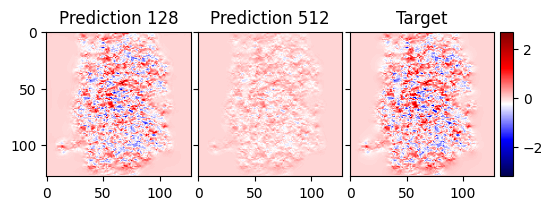

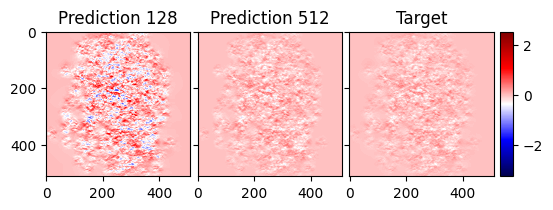

In [49]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

outdir= "/home/rodrigo/Desktop/McGill/Research/MSc_Thesis/Figures/IC/Results"
os.makedirs(outdir, exist_ok=True)

def show_dl(dl, outfile):
    batch = next(iter(dl))
    pred_128, y = model_128.inference_step(batch, 0, double_data_by_sym=False)
    pred_512, y = model_512.inference_step(batch, 0, double_data_by_sym=False)
    pred_128 = pred_128.mean(dim=0).detach().numpy()[0]
    pred_512 = pred_512.mean(dim=0).detach().numpy()[0]
    y = y.mean(dim=0).detach().numpy()[0]

    minmin = torch.min(torch.tensor([pred_128.min().item(), y.min().item(), pred_512.min().item()]))
    maxmax = torch.max(torch.tensor([pred_128.max().item(), y.max().item(), pred_512.max().item()]))

    fig, axs = plt.subplots(nrows=1, ncols=3, sharey=True, sharex=False, layout='constrained')
    im = axs[0].imshow(pred_128, vmin=minmin, vmax=maxmax, cmap='seismic')
    im = axs[1].imshow(pred_512, vmin=minmin, vmax=maxmax, cmap='seismic')
    im = axs[2].imshow(y, vmin=minmin, vmax=maxmax, cmap='seismic')

    axs[0].set_title('Prediction 128')
    axs[1].set_title('Prediction 512')
    axs[2].set_title('Target')
    # fig.tight_layout()

    fig.subplots_adjust(left=0.15, bottom=0, right=0.85, top=1, wspace=0.05)
    cbar_ax = fig.add_axes([0.86, 0.35 , 0.02, 0.3])
    fig.colorbar(im, cax=cbar_ax)
    # fig.colorbar(im, ax=axs, )
    # divider = make_axes_locatable(axs[1])
    # cax = divider.new_horizontal(size='5%', pad=0.1, pack_start = False)
    # fig.add_axes(cax)
    # fig.colorbar(im, cax = axs[2], orientation = 'vertical')
    # plt.tight_layout()
    plt.savefig(outfile, transparent=True)
    plt.show()


show_dl(dl_128, outfile=os.path.join(outdir, '128.png'))
show_dl(dl_512, outfile=os.path.join(outdir, '512.png'))